# Đề thi thử - Nhập môn xử lí ảnh số

### Câu 1 (2 Điểm): Cho ảnh có tên là a.jpg và thực hiện các yêu cầu:
### - Viết chương trình sử dụng mean filter cho ảnh (0.5 Điểm)
### - Viết chương trình sử dụng filter xác định biên của hình ảnh trên(0.5 Điểm)
### - Viết chương trình đổi màu ảnh từ không gian màu BGR sang một màu ngẫu nhiên (RGB) bằng cách thay đổi các kênh màu một cách ngẫu nhiên, sau đó lưu hình mới vào file a_random_color.jpg(0.5 Điểm)
### - Chuyển ảnh sang không gian màu HSV và tách riêng kênh Hue, Saturation, Value để lưu thành ba ảnh grayscale tương ứng (a_hue.jpg, a_saturation.jpg, a_value.jpg) (0.5 Điểm)


In [1]:
%pip install open-cv python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement open-cv (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for open-cv


In [3]:
import cv2
import numpy as np
import random
import os

# Define the output directory
output_dir = 'output_images'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# Load the image
try:
    img = cv2.imread('a.jpg')
    if img is None:
        raise FileNotFoundError("a.jpg not found. Please make sure the image file is in the same directory.")
except FileNotFoundError as e:
    print(e)
    exit()

## Mean Filter
# Define a 5x5 kernel for the mean filter
kernel_mean = np.ones((5, 5), np.float32) / 25
img_mean_filtered = cv2.filter2D(img, -1, kernel_mean)
cv2.imwrite(os.path.join(output_dir, 'a_mean_filtered.jpg'), img_mean_filtered)
print(f"Mean filter applied and saved as {os.path.join(output_dir, 'a_mean_filtered.jpg')}")

## Edge Detection Filter (using Sobel operator)
# Convert to grayscale for edge detection
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Sobel operator in X and Y directions
sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5)

# Combine the results
img_edges = cv2.magnitude(sobelx, sobely)
# Normalize to 8-bit for saving
img_edges_normalized = cv2.normalize(img_edges, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2.imwrite(os.path.join(output_dir, 'a_edges.jpg'), img_edges_normalized)
print(f"Edge detection applied and saved as {os.path.join(output_dir, 'a_edges.jpg')}")

## Random Color Change (BGR to random RGB)
img_random_color = img.copy()
# Get image dimensions
height, width, _ = img_random_color.shape

# Generate random permutations for BGR channels
b_channel, g_channel, r_channel = cv2.split(img_random_color)
channels = [b_channel, g_channel, r_channel]
random.shuffle(channels)
img_random_color_transformed = cv2.merge(channels)

cv2.imwrite(os.path.join(output_dir, 'a_random_color.jpg'), img_random_color_transformed)
print(f"Random color transformation applied and saved as {os.path.join(output_dir, 'a_random_color.jpg')}")

## Convert to HSV and split channels
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split the HSV image into H, S, V channels
h, s, v = cv2.split(hsv_img)

# Save each channel as a grayscale image
cv2.imwrite(os.path.join(output_dir, 'a_hue.jpg'), h)
cv2.imwrite(os.path.join(output_dir, 'a_saturation.jpg'), s)
cv2.imwrite(os.path.join(output_dir, 'a_value.jpg'), v)
print(f"HSV channels split and saved as {os.path.join(output_dir, 'a_hue.jpg')}, {os.path.join(output_dir, 'a_saturation.jpg')}, and {os.path.join(output_dir, 'a_value.jpg')}")

Created directory: output_images
Mean filter applied and saved as output_images\a_mean_filtered.jpg
Edge detection applied and saved as output_images\a_edges.jpg
Random color transformation applied and saved as output_images\a_random_color.jpg
HSV channels split and saved as output_images\a_hue.jpg, output_images\a_saturation.jpg, and output_images\a_value.jpg


Câu 2 (4 Điểm): Viết một chương trình Python sử dụng OpenCV để tạo menu động cho
phép người dùng chọn các phương pháp biến đổi ảnh từ một danh sách mở rộng, áp
dụng cho nhiều ảnh cùng lúc, và thực hiện các phân tích bổ sung. Các yêu cầu cụ thể:
1. Tạo một menu động cho phép người dùng chọn các phương pháp biến đổi ảnh sau:
- Image inverse transformation(0.5 Điểm)
- Gamma-Correction (với giá trị gamma ngẫu nhiên từ 0.5 đến 2.0) (0.5 Điểm)
- Log Transformation (với hệ số nhân ngẫu nhiên từ 1.0 đến 5.0) (0.5 Điểm)
- Histogram equalization(0.5 Điểm)
- Contrast Stretching (tùy chỉnh với giá trị min và max ngẫu nhiên từ 0 đến 255)
(0.5 Điểm)
- Adaptive Histogram Equalization (sử dụng CLAHE với ô lưới 8x8) (0.5 Điểm)
2. Chương trình phải xử lý đồng thời ba ảnh đầu vào có tên image1.jpg, image2.jpg, và
image3.jpg (0.5 Điểm)
3. Khi người dùng nhấn các phím sau, chương trình sẽ thực hiện biến đổi tương ứng
trên cả ba ảnh (0.5 Điểm)
- Phím I: Image inverse transformation
- Phím G: Gamma-Correction
- Phím L: Log Transformation
- Phím H: Histogram equalization
- Phím C: Contrast Stretching
- Phím A: Adaptive Histogram Equalization
4. Đối với mỗi biến đổi, lưu kết quả của từng ảnh vào các file riêng biệt với tên định
dạng output_[phương pháp]_[số ảnh].jpg (ví dụ: output_inverse_1.jpg,
output_gamma_2.jpg).


Chọn phương pháp biến đổi:
I: Image inverse transformation
G: Gamma-Correction
L: Log Transformation
H: Histogram equalization
C: Contrast Stretching
A: Adaptive Histogram Equalization
Q: Thoát
Đã lưu kết quả cho gamma


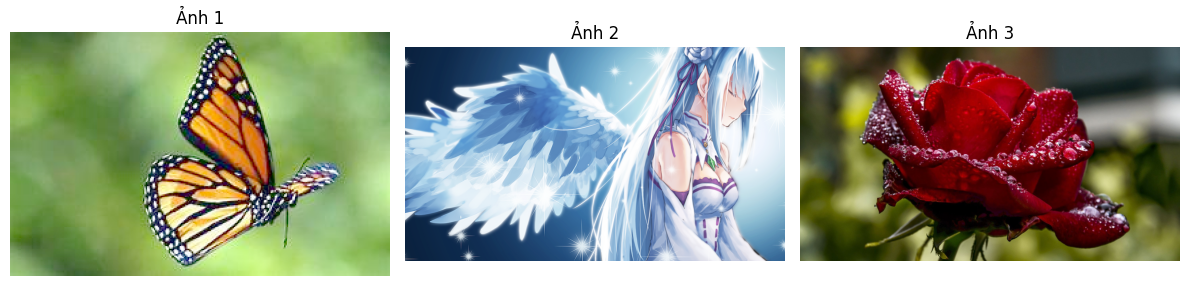


Chọn phương pháp biến đổi:
I: Image inverse transformation
G: Gamma-Correction
L: Log Transformation
H: Histogram equalization
C: Contrast Stretching
A: Adaptive Histogram Equalization
Q: Thoát
Đã lưu kết quả cho contrast


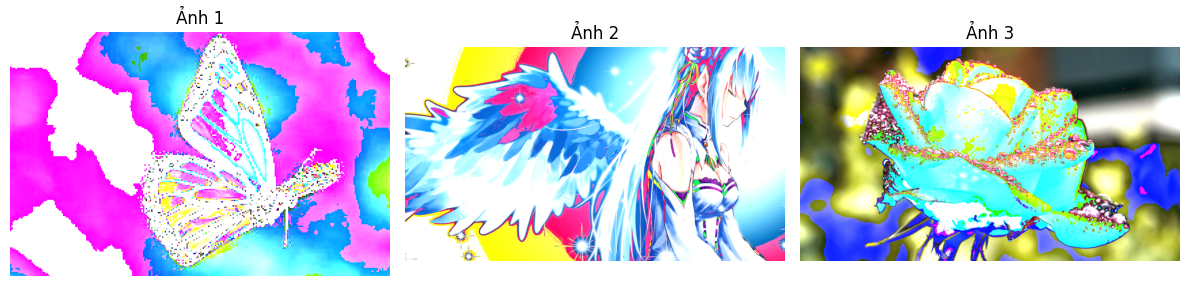


Chọn phương pháp biến đổi:
I: Image inverse transformation
G: Gamma-Correction
L: Log Transformation
H: Histogram equalization
C: Contrast Stretching
A: Adaptive Histogram Equalization
Q: Thoát


In [1]:
import cv2
import numpy as np
import os
import random
from matplotlib import pyplot as plt

# Tạo thư mục output_cau2 nếu chưa có
os.makedirs('output_cau2', exist_ok=True)

# Đọc 3 ảnh đầu vào
imgs = [cv2.imread(f'image{i}.jpg') for i in range(1,4)]

def inverse(img):
    return 255 - img

def gamma_correction(img):
    gamma = random.uniform(0.5, 2.0)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(256)]).astype('uint8')
    return cv2.LUT(img, table)

def log_transform(img):
    c = random.uniform(1.0, 5.0)
    img_float = img.astype(np.float32)
    out = c * np.log1p(img_float)
    out = np.clip(out * 255.0 / np.max(out), 0, 255).astype(np.uint8)
    return out

def hist_equalization(img):
    if len(img.shape)==2:
        return cv2.equalizeHist(img)
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    ycrcb[:,:,0] = cv2.equalizeHist(ycrcb[:,:,0])
    return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def contrast_stretch(img):
    min_val = random.randint(0, 100)
    max_val = random.randint(155, 255)
    out = np.clip((img - min_val) * 255.0 / (max_val - min_val), 0, 255).astype(np.uint8)
    return out

def adaptive_hist(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    if len(img.shape)==2:
        return clahe.apply(img)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    lab[:,:,0] = clahe.apply(lab[:,:,0])
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

funcs = {'I': inverse, 'G': gamma_correction, 'L': log_transform, 'H': hist_equalization, 'C': contrast_stretch, 'A': adaptive_hist}
names = {'I':'inverse','G':'gamma','L':'log','H':'hist','C':'contrast','A':'adaptive'}

while True:
    print('\nChọn phương pháp biến đổi:')
    print('I: Image inverse transformation')
    print('G: Gamma-Correction')
    print('L: Log Transformation')
    print('H: Histogram equalization')
    print('C: Contrast Stretching')
    print('A: Adaptive Histogram Equalization')
    print('Q: Thoát')
    k = input('Nhập phím: ').upper()
    if k == 'Q':
        break
    if k in funcs:
        outs = []
        for idx, img in enumerate(imgs):
            out = funcs[k](img)
            outs.append(out)
            cv2.imwrite(f'output_cau2/output_{names[k]}_{idx+1}.jpg', out)
        print(f'Đã lưu kết quả cho {names[k]}')
        # Hiển thị kết quả
        plt.figure(figsize=(12,4))
        for i, out in enumerate(outs):
            plt.subplot(1,3,i+1)
            if len(out.shape)==2:
                plt.imshow(out, cmap="gray")
            else:
                plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
            plt.title(f'Ảnh {i+1}')
            plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print('Phím không hợp lệ!')


Tuyệt vời, đây là phần text của "Câu 3" mà bạn có thể dễ dàng copy và paste vào code Python của mình. Tôi đã chuyển đổi các công thức toán học và điều kiện thành văn bản rõ ràng.

Câu 3 (4 Điểm): Viết một chương trình Python sử dụng OpenCV để xử lý ba ảnh: colorful-ripe-tropical-fruits.jpg, quang-ninh.jpg, và pagoda.jpg với các phương pháp biến đổi và tiền xử lý nâng cao.
Tăng kích thước ảnh colorful-ripe-tropical-fruits.jpg thêm 30 pixel ở cả chiều rộng và chiều cao. (0.5 Điểm)

Xoay ảnh quang-ninh.jpg 45 độ theo chiều kim đồng hồ và lật ngang. (0.5 Điểm)

Tăng kích thước ảnh pagoda.jpg 5 lần và áp dụng Gaussian blur với kernel 7x7 để làm mịn. (0.5 Điểm)

Ứng dụng công thức biến đổi tuyến tính dưới đây cho ảnh pagoda.jpg. (1.5 Điểm)

Công thức biến đổi tuyến tính được sử dụng để điều chỉnh độ sáng và tương phản của ảnh bất kỳ nào sau:

I 
out
​
 (x,y)=α⋅I 
in
​
 (x,y)+β

I 
in
​
 (x,y): Giá trị pixel đầu vào tại tọa độ (x,y).

I 
out
​
 (x,y): Giá trị pixel đầu ra tại tọa độ (x,y) sau khi biến đổi.

α: Hệ số tương phản (contrast factor), giá trị α nằm trong khoảng [0.5,2.0] (giá trị >1 tăng tương phản, <1 giảm tương phản).

β: Độ lệch sáng (brightness offset), giá trị β nằm trong khoảng [−50,50] (đơn vị pixel, dương tăng sáng, âm giảm sáng).

Điều kiện:
Giá trị đầu ra I 
out
​
 (x,y) phải được giới hạn trong khoảng [0,255] để phù hợp với định dạng ảnh 8-bit:

I 
out
​
 (x,y)=clip(I 
out
​
 (x,y),0,255)

(Hàm clip đảm bảo giá trị không vượt quá 0 hoặc 255.)

In [3]:
import cv2
import numpy as np
import os # Import the os module for directory operations

def process_images():
    """
    Processes images according to the specified requirements:
    - Resizes 'colorful-ripe-tropical-fruits.jpg'
    - Rotates 'quang-ninh.jpg'
    - Resizes and applies Gaussian blur to 'pagoda.jpg'
    - Adjusts brightness and contrast of 'pagoda.jpg'
    
    All output images are saved in a new 'output_images' folder.
    """

    # Create the output directory if it doesn't exist
    output_dir = 'output_images'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")

    # --- 1. Resize 'colorful-ripe-tropical-fruits.jpg' ---
    try:
        img_fruits = cv2.imread('colorful-ripe-tropical-fruits.jpg')
        if img_fruits is None:
            raise FileNotFoundError("colorful-ripe-tropical-fruits.jpg not found. Make sure it's in the same directory as the script.")

        # Increase size by 30 pixels in both width and height
        new_width_fruits = img_fruits.shape[1] + 30
        new_height_fruits = img_fruits.shape[0] + 30
        resized_fruits = cv2.resize(img_fruits, (new_width_fruits, new_height_fruits))
        
        output_path = os.path.join(output_dir, 'output_colorful-ripe-tropical-fruits_resized.jpg')
        cv2.imwrite(output_path, resized_fruits)
        print(f"Resized 'colorful-ripe-tropical-fruits.jpg' and saved as '{output_path}'")
    except Exception as e:
        print(f"Error processing 'colorful-ripe-tropical-fruits.jpg': {e}")

    # --- 2. Rotate 'quang-ninh.jpg' ---
    try:
        img_quangninh = cv2.imread('quang-ninh.jpg')
        if img_quangninh is None:
            raise FileNotFoundError("quang-ninh.jpg not found. Make sure it's in the same directory as the script.")

        # Rotate 45 degrees clockwise
        (h, w) = img_quangninh.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, -45, 1.0) # -45 for clockwise rotation
        rotated_quangninh = cv2.warpAffine(img_quangninh, M, (w, h))
        
        output_path = os.path.join(output_dir, 'output_quang-ninh_rotated.jpg')
        cv2.imwrite(output_path, rotated_quangninh)
        print(f"Rotated 'quang-ninh.jpg' and saved as '{output_path}'")
    except Exception as e:
        print(f"Error processing 'quang-ninh.jpg': {e}")

    # --- 3. Resize and apply Gaussian blur to 'pagoda.jpg' ---
    try:
        img_pagoda = cv2.imread('pagoda.jpg')
        if img_pagoda is None:
            raise FileNotFoundError("pagoda.jpg not found. Make sure it's in the same directory as the script.")

        # Increase size 5 times
        resized_pagoda = cv2.resize(img_pagoda, (img_pagoda.shape[1] * 5, img_pagoda.shape[0] * 5))

        # Apply Gaussian blur with a 7x7 kernel
        blurred_pagoda = cv2.GaussianBlur(resized_pagoda, (7, 7), 0)
        
        output_path = os.path.join(output_dir, 'output_pagoda_resized_blurred.jpg')
        cv2.imwrite(output_path, blurred_pagoda)
        print(f"Resized and blurred 'pagoda.jpg' and saved as '{output_path}'")

        # --- 4. Adjust brightness and contrast of 'pagoda.jpg' ---
        # Using the original (non-resized/blurred) pagoda image for this step
        # Formula: Out(x, y) = alpha * In(x, y) + beta
        # alpha: contrast factor [0.5, 2.0]
        # beta: brightness offset [-50, 50]

        alpha = 1.5  # Example alpha for increased contrast
        beta = 30    # Example beta for increased brightness

        # Convert image to float32 for calculations to avoid overflow before clipping
        adjusted_pagoda = cv2.convertScaleAbs(img_pagoda, alpha=alpha, beta=beta)
        # cv2.convertScaleAbs performs: (alpha*src + beta) and clips values to 0-255

        output_path = os.path.join(output_dir, 'output_pagoda_adjusted_brightness_contrast.jpg')
        cv2.imwrite(output_path, adjusted_pagoda)
        print(f"Adjusted brightness and contrast of 'pagoda.jpg' (alpha={alpha}, beta={beta}) and saved as '{output_path}'")

    except Exception as e:
        print(f"Error processing 'pagoda.jpg': {e}")

if __name__ == "__main__":
    process_images()

Created directory: output_images
Resized 'colorful-ripe-tropical-fruits.jpg' and saved as 'output_images\output_colorful-ripe-tropical-fruits_resized.jpg'
Error processing 'quang-ninh.jpg': quang-ninh.jpg not found. Make sure it's in the same directory as the script.
Resized and blurred 'pagoda.jpg' and saved as 'output_images\output_pagoda_resized_blurred.jpg'
Adjusted brightness and contrast of 'pagoda.jpg' (alpha=1.5, beta=30) and saved as 'output_images\output_pagoda_adjusted_brightness_contrast.jpg'
